We have 1000 shipments and let us say that we reject a shipment from the vendor if there is more than 1 faulty item in 100 items. Let the number of faulty items follow a binomial distribution. Find the probability of Type 1 error. 

We can formulate our hypothesis as - 

No : mu = 0.01
N1 : mu > 0.01

Then the P(Type 1 error) = P(No is rejected | No)
                         = P(x = 2 : mu = 0.01) #No is rejected as soon as when x>1

In [1]:
from scipy.stats import binom
n = 1000
p = 0.01
x = 2
P_Type_1_error = binom.pmf(x, n, p)
print('%2f'% P_Type_1_error)

0.002200


The population mean is equal to 8 and the population standard deviation is 0.2. Find the probability of type 1 error if number of samples is equal to 16.

We can formulate our hypothesis as -

No : mu = 8 N1 : mu != 8 
So, we can write N1 as,

N1 : mu < 7.9 or mu > 8.1

Then the P(Type 1 error) = P(No is rejected | No) = P(mu < 7.9 : mu = 8) + P(mu > 8.1 : mu = 8)
#No is rejected as soon as when mu is != 8.

In [2]:
def Zscore(x, mean, stdev):
    return (x - mean)/stdev

x1 = 7.9
x2 = 8.1
mean = 8
n = 16
sqrt_n = n**0.5
stdev = 0.2/sqrt_n
z1 = Zscore(x1, mean, stdev)
z2 = Zscore(x2, mean, stdev)

In [3]:
from scipy.stats import norm

P_Type_1_error = norm.cdf(z1) + (1 - norm.cdf(z2))
print('%2f'% P_Type_1_error)

0.045500


A coffee shop sells 500 cups per day on an average. A new hostel comes up and now the shop sells

550, 570, 490, 615, 505, 580, 570, 460, 600, 580, 530, 520 cups of coffee (per day), in the first 12 days after the new hostel is inaugurated.

Can you tell if the sales will increase? Use 5% confidence level.

We can formulate our hypothesis as -

No : mu = 500 

N1 : mu > 500

In [4]:
import numpy as np

sales = np.array([550, 570, 490, 615, 505, 580, 570, 460, 600, 580, 530, 520])
s = np.std(sales)
x_bar = np.mean(sales)
mu = 500
n = len(sales)

In [5]:
import scipy.stats as st
def Tscore(x, mean, stdev):
    return (x - mean)/stdev

t = Tscore(x_bar, mu, s/(n**0.5))
t_point_95 = st.t.ppf( 0.95, df = n-1)

if abs(t)>abs(t_point_95):
    print("Null Hypothesis is rejected, sales will go up")

else:
    print("Null Hypothesis is acccepted, sales will not go up")

Null Hypothesis is rejected, sales will go up


A vacuum cleaner's power consumption is tested. 46kWh power is used per year (on an average), with the standard deviation being 11.9.
A sample of 12 homes is taken, the average power consumed is 42kWh.
Check whether the average consumption is 46 or less. Take 5% confidence level.

We can formulate our hypothesis as -

No : mu = 46

N1 : mu < 46

In [6]:
x = 42
mu = 46
n = 12
sqrt_n = n**0.5
stdev = 11.9/sqrt_n
tval = Tscore(x, mu, stdev)
t_point_95 = st.t.ppf( 0.95, df = n-1)

if abs(tval)>abs(t_point_95):
    print("Null Hypothesis is rejected, consumption will be less than 46")

else:
    print("Null Hypothesis is acccepted, consumption will not be less than 46")

Null Hypothesis is acccepted, consumption will not be less than 46


A sample of 11 circuits from a large normal population has a mean resistance of 2.2 ohms, we know from the past testing that the population standard deviaton is 0.35 ohms. Find the 95% confidence interval for the population mean.

In [7]:
x_bar = 2.2
sigma = 0.35
n = 11
alpha = 1-0.95
z_point_95 = norm.ppf(alpha/2)
mu_higher = x_bar - (z_point_95)*(sigma/(n**0.5))
mu_lower = x_bar + (z_point_95)*(sigma/(n**0.5))
print("The mean lies between:",(mu_lower,mu_higher))

The mean lies between: (1.9931670182940682, 2.406832981705932)


A random sample has n = 25, s = 8 and x_bar = 50. Form a 95% confidence interval for mu.

In [8]:
n = 25
s = 8
x_bar = 50
df = n-1
t_point_95 = st.t.ppf(alpha/2, df)
mu_higher = x_bar - (t_point_95)*(s/(n**0.5))
mu_lower = x_bar + (t_point_95)*(s/(n**0.5))
print("The mean lies between:",(mu_lower,mu_higher))

The mean lies between: (46.697762301395166, 53.302237698604834)


The wear and tear of 2 different materials is compared. 12 samples are taken from material1 and its sample mean is observed to be 85 with a standard deviation of 4. For the second material, the number of samples taken is 10 and the sample mean is 81, with a standard deviation of 5. Check if the difference in the population means of both the materials is greater than 2. Use the significance level of 5%. 

We can formulate our hypothesis as -

No : mu1 - mu2 = 2

N1 : mu1 - mu2 > 2

This is a one tailed test.

In [9]:
def Tscore(x1, x2, mu_diff, s1, s2, n1, n2):
    sp = (s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2)
    t = ((x1-x2) - (mu_diff))/(sp*((1/n1+1/n2)**0.5))
    return t

mu_diff = 2 #mu_diff = mu1-mu2
x1 = 85
x2 = 81
n1 = 12
n2 = 10
s1 = 4
s2 = 5

tval = Tscore(x1, x2, mu_diff, s1, s2, n1, n2)
t_point_95 = st.t.ppf(alpha, df = n1+n2-2)

if abs(tval)>abs(t_point_95):
    print("Null Hypothesis is rejected, the difference in the population means is greater than 2")

else:
    print("Null Hypothesis is acccepted, the difference in the population means is not greater than 2")

Null Hypothesis is acccepted, the difference in the population means is not greater than 2


ANOVA

In [10]:
#The population is defined as 'p'
p = np.array([1,2,2,2,2,3,4,4,5])

sample_1 = [2,4,2]
sample_2 = [2,3,4]
sample_3 = [1,2,5]

We can formulate our hypothesis as -

No : mu1 + mu2 + mu3

N1 : mu1, mu2 and mu3 are different

In [11]:
print(sample_1)
print(sample_2)
print(sample_3)

[2, 4, 2]
[2, 3, 4]
[1, 2, 5]


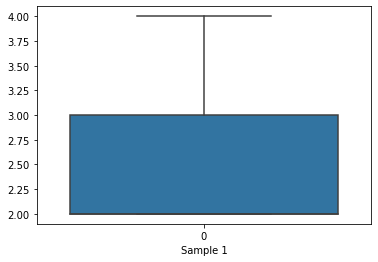

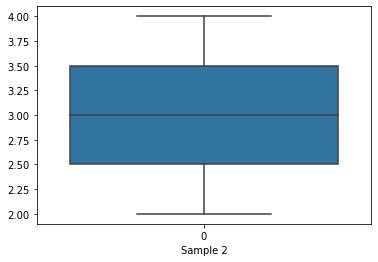

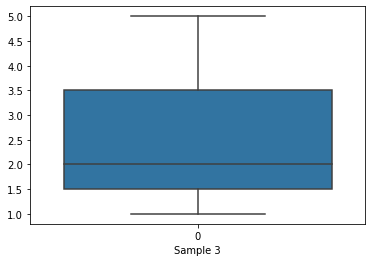

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data = sample_1)
plt.xlabel("Sample 1")
plt.show()
sns.boxplot(data = sample_2)
plt.xlabel("Sample 2")
plt.show()
sns.boxplot(data = sample_3)
plt.xlabel("Sample 3")
plt.show()

In [13]:
SSW1 = np.sum((sample_1-np.mean(sample_1))**2)
SSW2 = np.sum((sample_2-np.mean(sample_2))**2)
SSW3 = np.sum((sample_3-np.mean(sample_3))**2)
SSW = (SSW1+SSW2+SSW3)
SSW

13.333333333333334

In [14]:
SST1 = np.sum((sample_1-np.mean(p))**2)
SST2 = np.sum((sample_2-np.mean(p))**2)
SST3 = np.sum((sample_3-np.mean(p))**2)
SST = SST1+SST2+SST3
SSB = SST-SSW
SSB

0.22222222222222143

In [15]:
#F-Test
F = (SSB/(len(sample_1)-1))/(SSW/(len(p)-len(sample_1)))
print(F)

import scipy.stats

#find F critical value
f_c = scipy.stats.f.ppf(q=0.95, dfn=len(sample_1)-1, dfd=len(p)-len(sample_1))
print(f_c)
if F<f_c:
    print("Null Hypothesis is rejected, the means are diff")
else:
    print("Null Hypothesis is acccepted, the means are same")

0.04999999999999982
5.143252849784718
Null Hypothesis is rejected, the means are diff
